In [10]:
from AmericanOptionSolver import AmericanOptionSolver
from QDplus import QDplus, OptionType

import time


def run_test(l, m, n, p, r, q, sigma, S, K, T):
    # 初始化AmericanOptionSolver
    solver = AmericanOptionSolver(r, q, sigma, K, T, OptionType.Put)  # 或者OptionType.Call
    solver.assign_par(l, m, n, p)

    # 记录开始时间
    start_time = time.time()

    # 计算期权价格
    price = solver.solve(0.0, S)

    # 计算结束时间和运行时间
    end_time = time.time()
    cpu_seconds = end_time - start_time

    return price, cpu_seconds

# 测试参数
r = q = 0.05  # 无风险利率和股息率
sigma = 0.25 # 波动率
S = K = 100  # 标的资产价格和行权价格
T = 1        # 到期时间

test_parameters = [
    (5, 1, 4, 15),
    (7, 2, 5, 20),
    (11, 2, 5, 31),
    (15, 2, 6, 41),
    (15, 3, 7, 41),
    (25, 4, 9, 51),
    (25, 5, 12, 61),
    (25, 6, 15, 61),
    (35, 8, 16, 81),
    (51, 8, 24, 101),
    (65, 8, 32, 101)
]

results = []

for l, m, n, p in test_parameters:
    start_time = time.time()
    price, iterations = run_test(l, m, n, p, r, q, sigma, S, K, T)
    end_time = time.time()
    results.append({
        "l": l,
        "m": m,
        "n": n,
        "price": price,
        "iterations": iterations,
        "cpu_time": end_time - start_time
    })


print(results)

step 5. starting iteration ...

  iter = 1, err = 0.7342391316003458

step 5. starting iteration ...

  iter = 1, err = 0.8088955031820456

  iter = 2, err = 0.448186704555209

step 5. starting iteration ...

  iter = 1, err = 0.8089005420799507

  iter = 2, err = 0.44818827297345065

step 5. starting iteration ...

  iter = 1, err = 0.877061817388357

  iter = 2, err = 0.48652182951539935

step 5. starting iteration ...

  iter = 1, err = 0.94032265236501

  iter = 2, err = 0.5220363509610086

  iter = 3, err = 0.2796265464351056

step 5. starting iteration ...

  iter = 1, err = 1.0555392823738698

  iter = 2, err = 0.5866313701358216

  iter = 3, err = 0.31449819198648993

  iter = 4, err = 0.16446457125128155

step 5. starting iteration ...

  iter = 1, err = 1.2079438177612662

  iter = 2, err = 0.6719789047043573

  iter = 3, err = 0.36052816071642113

  iter = 4, err = 0.18865132102387513

  iter = 5, err = 0.09712515258112954

step 5. starting iteration ...

  iter = 1, err = 1

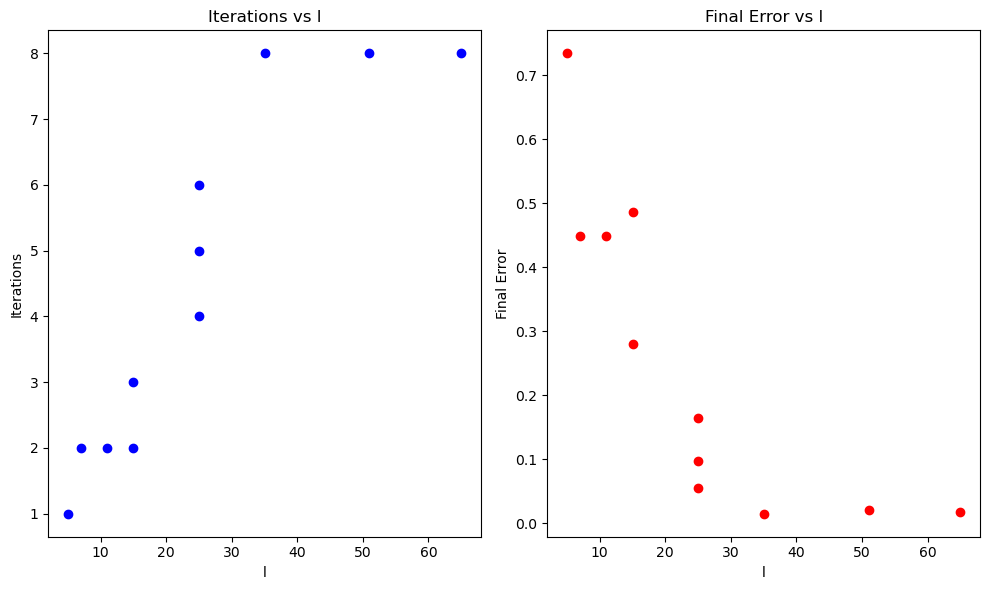

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

output_data = [
    (5, 1, 4, 15, 1, 0.7342391316003458),
    (7, 2, 5, 20, 2, 0.448186704555209),
    (11, 2, 5, 31, 2, 0.44818827297345065),
    (15, 2, 6, 41, 2, 0.48652182951539935),
    (15, 3, 7, 41, 3, 0.2796265464351056),
    (25, 4, 9, 51, 4, 0.16446457125128155),
    (25, 5, 12, 61, 5, 0.09712515258112954),
    (25, 6, 15, 61, 6, 0.05515069376942521),
    (35, 8, 16, 81, 8, 0.014540485601843074),
    (51, 8, 24, 101, 8, 0.020452333710689392),
    (65, 8, 32, 101, 8, 0.017744356687812376)
]

df = pd.DataFrame(output_data, columns=['l', 'm', 'n', 'p', 'iterations', 'final_error'])

plt.figure(figsize=(10, 6))

# 绘制迭代次数
plt.subplot(1, 2, 1)
plt.scatter(df['l'], df['iterations'], color='blue')
plt.title('Iterations vs l')
plt.xlabel('l')
plt.ylabel('Iterations')

# 绘制最终错误
plt.subplot(1, 2, 2)
plt.scatter(df['l'], df['final_error'], color='red')
plt.title('Final Error vs l')
plt.xlabel('l')
plt.ylabel('Final Error')

plt.tight_layout()
plt.show()


In [30]:
from itertools import product

# 定义参数范围
l_values = range(10, 60, 5)  
m_values = range(2, 10)        
n_values = range(5, 20)      
p_values = range(20, 120, 5) 

# 生成所有可能的组合
all_combinations = list(product(l_values, m_values, n_values, p_values))

# 随机选择500组组合
import random
random.seed(0)  # 可以设置一个种子值以便重现结果
selected_combinations = random.sample(all_combinations, 500)


results = []
for l, m, n, p in selected_combinations:
    solver = AmericanOptionSolver(r, q, sigma, K, T, OptionType.Put)
    solver.assign_par(l, m, n, p)
    solver.iter_tol = 1e-5
    solver.max_iters = 100
    solver.solve(0.0, S)
    steps = len(solver.iter_records)  # 获取迭代步骤数
    final_error = solver.iter_records[-1] if solver.iter_records else None
    results.append((l, m, n, p, steps))
import pandas as pd

df = pd.DataFrame(results, columns=['l', 'm', 'n', 'p', 'Steps to Convergence'])





step 5. starting iteration ...

  iter = 1, err = 0.8770613400068213

  iter = 2, err = 0.4865216982160464

  iter = 3, err = 0.26043112718052974

  iter = 4, err = 0.13602314249921543

  iter = 5, err = 0.06992145861058978

  iter = 6, err = 0.035583919576289605

  iter = 7, err = 0.017994101523092856

  iter = 8, err = 0.009060485353216978

  iter = 9, err = 0.004547980975232707

  iter = 10, err = 0.002277217376278155

  iter = 11, err = 0.0011378027934277936

  iter = 12, err = 0.000567437485081711

  iter = 13, err = 0.00028253180824558026

  iter = 14, err = 0.00014049314740401813

  iter = 15, err = 6.980404259000804e-05

  iter = 16, err = 3.467612543735185e-05

  iter = 17, err = 1.7238889329542137e-05

  iter = 18, err = 8.587469242103803e-06

step 5. starting iteration ...

  iter = 1, err = 1.5046745584273835

  iter = 2, err = 0.8379729521554156

  iter = 3, err = 0.44997542294040493

  iter = 4, err = 0.23561884207858663

  iter = 5, err = 0.12137740345518283

  iter = 6,

  iter = 11, err = 0.0017788269267527026

  iter = 12, err = 0.0008888540822952184

  iter = 13, err = 0.00044344481601111976

  iter = 14, err = 0.00022094032381804785

  iter = 15, err = 0.00010997518473357894

  iter = 16, err = 5.4717318028711735e-05

  iter = 17, err = 2.7232302569582998e-05

  iter = 18, err = 1.3570950050213818e-05

  iter = 19, err = 6.780741486590513e-06

step 5. starting iteration ...

  iter = 1, err = 1.4262119327107945

  iter = 2, err = 0.794095626678761

  iter = 3, err = 0.42633815125301516

  iter = 4, err = 0.2232098631030235

  iter = 5, err = 0.11497099491740838

  iter = 6, err = 0.05861726577622042

  iter = 7, err = 0.02969406541047598

  iter = 8, err = 0.014978495892697627

  iter = 9, err = 0.007532548345074064

  iter = 10, err = 0.003778960391763338

  iter = 11, err = 0.001891985757375212

  iter = 12, err = 0.0009455469245330168

  iter = 13, err = 0.0004718039188673261

  iter = 14, err = 0.00023510689414313414

  iter = 15, err = 0.00011

  iter = 1, err = 1.3853105938809944

  iter = 2, err = 0.7712204182791277

  iter = 3, err = 0.4140140931383735

  iter = 4, err = 0.2167397656357231

  iter = 5, err = 0.11163058550639403

  iter = 6, err = 0.05691054316064632

  iter = 7, err = 0.028827687210998657

  iter = 8, err = 0.014540552957011784

  iter = 9, err = 0.007311832864210361

  iter = 10, err = 0.003667980965883865

  iter = 11, err = 0.0018362922928709066

  iter = 12, err = 0.0009176462763951742

  iter = 13, err = 0.0004578482968589944

  iter = 14, err = 0.00022813592545112453

  iter = 15, err = 0.0001135659303269485

  iter = 16, err = 5.6507833753932607e-05

  iter = 17, err = 2.8124935405713526e-05

  iter = 18, err = 1.4016177694681498e-05

  iter = 19, err = 7.0031383221192044e-06

step 5. starting iteration ...

  iter = 1, err = 0.8089025468865865

  iter = 2, err = 0.4481888963291713

  iter = 3, err = 0.23968442377206547

  iter = 4, err = 0.12509507632277422

  iter = 5, err = 0.06426697400059954

 

  iter = 10, err = 0.003991716862837275

  iter = 11, err = 0.001998747361144205

  iter = 12, err = 0.0009990272498641146

  iter = 13, err = 0.0004985522492815402

  iter = 14, err = 0.0002484669454137291

  iter = 15, err = 0.00012370981717419867

  iter = 16, err = 6.156531581612081e-05

  iter = 17, err = 3.0645973901018596e-05

  iter = 18, err = 1.527353823207578e-05

  iter = 19, err = 7.63120485500501e-06

step 5. starting iteration ...

  iter = 1, err = 1.2996572726955362

  iter = 2, err = 0.7233039298717919

  iter = 3, err = 0.38819340728191243

  iter = 4, err = 0.20318147534600353

  iter = 5, err = 0.10462950408514889

  iter = 6, err = 0.05333291449103256

  iter = 7, err = 0.027011312813429857

  iter = 8, err = 0.013622259510805056

  iter = 9, err = 0.00684895712603021

  iter = 10, err = 0.003435202049995638

  iter = 11, err = 0.0017194563028964675

  iter = 12, err = 0.000859105431897798

  iter = 13, err = 0.00042856189296632956

  iter = 14, err = 0.0002135047

  iter = 1, err = 1.159370205993623

  iter = 2, err = 0.6447862594016972

  iter = 3, err = 0.3458665109904545

  iter = 4, err = 0.18094899005086726

  iter = 5, err = 0.09314634558222701

  iter = 6, err = 0.047463530000041096

  iter = 7, err = 0.024030745642380485

  iter = 8, err = 0.01211505806866796

  iter = 9, err = 0.00608906262418584

  iter = 10, err = 0.0030529624830510638

  iter = 11, err = 0.0015275558634455903

  iter = 12, err = 0.0007629289003388053

  iter = 13, err = 0.0003804348960186887

  iter = 14, err = 0.00018945475155450852

  iter = 15, err = 9.425972226338134e-05

  iter = 16, err = 4.687928030204694e-05

  iter = 17, err = 2.3324179781380395e-05

  iter = 18, err = 1.1621506142180333e-05

  iter = 19, err = 5.807003732534224e-06

step 5. starting iteration ...

  iter = 1, err = 1.426201878720172

  iter = 2, err = 0.7940932136823811

  iter = 3, err = 0.4263386962397206

  iter = 4, err = 0.22321114601238587

  iter = 5, err = 0.11497218118532307

  ite

  iter = 7, err = 0.01799403720856184

  iter = 8, err = 0.009060444691648305

  iter = 9, err = 0.0045479563652512465

  iter = 10, err = 0.0022772029436404395

  iter = 11, err = 0.0011377945344285142

  iter = 12, err = 0.0005674328538602365

  iter = 13, err = 0.000282529256852543

  iter = 14, err = 0.00014049176425778067

  iter = 15, err = 6.980330417933714e-05

  iter = 16, err = 3.467573699493746e-05

  iter = 17, err = 1.7238688007620927e-05

  iter = 18, err = 8.587366393417104e-06

step 5. starting iteration ...

  iter = 1, err = 1.4262117867058854

  iter = 2, err = 0.7940956025330385

  iter = 3, err = 0.4263381714633901

  iter = 4, err = 0.2232098918768576

  iter = 5, err = 0.11497101944415392

  iter = 6, err = 0.058617283381837276

  iter = 7, err = 0.029694076981490198

  iter = 8, err = 0.014978503095874476

  iter = 9, err = 0.007532552664661437

  iter = 10, err = 0.0037789629107704463

  iter = 11, err = 0.0018919871939140091

  iter = 12, err = 0.0009455477284

  iter = 13, err = 0.000498552329845904

  iter = 14, err = 0.0002484669890267545

  iter = 15, err = 0.00012370984038276826

  iter = 16, err = 6.156532808546304e-05

  iter = 17, err = 3.06459802667811e-05

  iter = 18, err = 1.527354141368782e-05

  iter = 19, err = 7.631206493984545e-06

step 5. starting iteration ...

  iter = 1, err = 0.9995888393906616

  iter = 2, err = 0.5552736159467652

  iter = 3, err = 0.2975745412635057

  iter = 4, err = 0.15556686344031306

  iter = 5, err = 0.08002934602611472

  iter = 6, err = 0.04075591156575966

  iter = 7, err = 0.020623024273514926

  iter = 8, err = 0.010391107735099533

  iter = 9, err = 0.005219500092512098

  iter = 10, err = 0.002615353923186516

  iter = 11, err = 0.0013077510873353742

  iter = 12, err = 0.0006527123861847418

  iter = 13, err = 0.00032525480830489

  iter = 14, err = 0.0001618671083256091

  iter = 15, err = 8.048332796977515e-05

  iter = 16, err = 4.000579527169217e-05

  iter = 17, err = 1.989627780079

step 5. starting iteration ...

  iter = 1, err = 1.4659709378414234

  iter = 2, err = 0.8163297491493888

  iter = 3, err = 0.4383159777476177

  iter = 4, err = 0.22949787321057633

  iter = 5, err = 0.11821727252910619

  iter = 6, err = 0.0602758414889045

  iter = 7, err = 0.030535978617577276

  iter = 8, err = 0.015404059677915402

  iter = 9, err = 0.007747018293231716

  iter = 10, err = 0.0038867958122252655

  iter = 11, err = 0.0019460994471657998

  iter = 12, err = 0.0009726550720195162

  iter = 13, err = 0.00048536256552782355

  iter = 14, err = 0.00024187927590648404

  iter = 15, err = 0.00012042316989825345

  iter = 16, err = 5.992675742848317e-05

  iter = 17, err = 2.9829220558036097e-05

  iter = 18, err = 1.4866192565155443e-05

  iter = 19, err = 7.427729226268139e-06

step 5. starting iteration ...

  iter = 1, err = 1.4659709937432481

  iter = 2, err = 0.8163297581094107

  iter = 3, err = 0.43831596969106945

  iter = 4, err = 0.22949786193305363

  iter 

  iter = 12, err = 0.0009726586788473653

  iter = 13, err = 0.00048536455068277587

  iter = 14, err = 0.00024188035171449784

  iter = 15, err = 0.00012042374441977973

  iter = 16, err = 5.992705984536559e-05

  iter = 17, err = 2.982937744559759e-05

  iter = 18, err = 1.4866272782139555e-05

  iter = 19, err = 7.427769669771682e-06

step 5. starting iteration ...

  iter = 1, err = 1.3853121329956737

  iter = 2, err = 0.7712207303750214

  iter = 3, err = 0.414013945550413

  iter = 4, err = 0.21673951664595675

  iter = 5, err = 0.11163036628402395

  iter = 6, err = 0.05691038388034902

  iter = 7, err = 0.028827581945386652

  iter = 8, err = 0.01454048725106512

  iter = 9, err = 0.007311793412151386

  iter = 10, err = 0.003667957948345061

  iter = 11, err = 0.0018362791659118968

  iter = 12, err = 0.0009176389314382584

  iter = 13, err = 0.00045784425545064024

  iter = 14, err = 0.00022813373573572315

  iter = 15, err = 0.00011356476100472461

  iter = 16, err = 5.6507

  iter = 1, err = 1.343167687740789

  iter = 2, err = 0.7476463174186174

  iter = 3, err = 0.40131140980100416

  iter = 4, err = 0.2100699219185374

  iter = 5, err = 0.10818659164331239

  iter = 6, err = 0.05515067194621177

  iter = 7, err = 0.027934217006775054

  iter = 8, err = 0.01408885807462684

  iter = 9, err = 0.007084157247308507

  iter = 10, err = 0.0035534868013170763

  iter = 11, err = 0.0017788273387556101

  iter = 12, err = 0.000888854312814016

  iter = 13, err = 0.00044344494281729427

  iter = 14, err = 0.0002209403925251248

  iter = 15, err = 0.00010997522141938

  iter = 16, err = 5.471733723090124e-05

  iter = 17, err = 2.723231248824215e-05

  iter = 18, err = 1.357095514050751e-05

  iter = 19, err = 6.78074399921323e-06

step 5. starting iteration ...

  iter = 1, err = 0.8770620130348165

  iter = 2, err = 0.4865218833290416

  iter = 3, err = 0.2604311157528056

  iter = 4, err = 0.13602307606170405

  iter = 5, err = 0.0699213924721458

  iter = 6,

  iter = 11, err = 0.0018920003340849416

  iter = 12, err = 0.0009455550828735366

  iter = 13, err = 0.00047180840917299333

  iter = 14, err = 0.00023510932790913236

  iter = 15, err = 0.0001170454645335324

  iter = 16, err = 5.824274863157056e-05

  iter = 17, err = 2.898979102253532e-05

  iter = 18, err = 1.444753179881938e-05

  iter = 19, err = 7.218602362655507e-06

step 5. starting iteration ...

  iter = 1, err = 0.940317247030994

  iter = 2, err = 0.5220350812093699

  iter = 3, err = 0.279626880389545

  iter = 4, err = 0.14612730597992596

  iter = 5, err = 0.07514880290974979

  iter = 6, err = 0.038259268017581366

  iter = 7, err = 0.019354268243331967

  iter = 8, err = 0.009749077667075935

  iter = 9, err = 0.004895570587406637

  iter = 10, err = 0.0024522879127931987

  iter = 11, err = 0.001225818913550464

  iter = 12, err = 0.0006116148461629435

  iter = 13, err = 0.00030467158881950613

  iter = 14, err = 0.0001515724421758664

  iter = 15, err = 7.5340565

  iter = 3, err = 0.31449817224443755

  iter = 4, err = 0.16446453734113736

  iter = 5, err = 0.08462860702508228

  iter = 6, err = 0.04310831108751858

  iter = 7, err = 0.021818358912728028

  iter = 8, err = 0.010995937521553046

  iter = 9, err = 0.005524638156214734

  iter = 10, err = 0.002768947894830314

  iter = 11, err = 0.0013849166406479938

  iter = 12, err = 0.0006914144197897722

  iter = 13, err = 0.0003446354545661043

  iter = 14, err = 0.00017155857075159533

  iter = 15, err = 8.532368322564188e-05

  iter = 16, err = 4.2420958874034085e-05

  iter = 17, err = 2.1100657647241543e-05

  iter = 18, err = 1.0512231117095299e-05

  iter = 19, err = 5.2529497606786456e-06

step 5. starting iteration ...

  iter = 1, err = 0.8770625090575906

  iter = 2, err = 0.48652201852764315

  iter = 3, err = 0.2604311061236901

  iter = 4, err = 0.13602302620828208

  iter = 5, err = 0.06992134314544672

  iter = 6, err = 0.03558383183277929

  iter = 7, err = 0.0179940422115173

  iter = 10, err = 0.002615353923186516

  iter = 11, err = 0.0013077510873353742

  iter = 12, err = 0.0006527123861847418

  iter = 13, err = 0.00032525480830489

  iter = 14, err = 0.0001618671083256091

  iter = 15, err = 8.048332796977515e-05

  iter = 16, err = 4.000579527169217e-05

  iter = 17, err = 1.9896277800795277e-05

  iter = 18, err = 9.911657496230147e-06

step 5. starting iteration ...

  iter = 1, err = 1.4262102178451634

  iter = 2, err = 0.794095277074074

  iter = 3, err = 0.4263383135798589

  iter = 4, err = 0.22321013878176127

  iter = 5, err = 0.1149712379249119

  iter = 6, err = 0.058617442425261145

  iter = 7, err = 0.029694182189960693

  iter = 8, err = 0.014978568803087388

  iter = 9, err = 0.0075325921328321084

  iter = 10, err = 0.0037789859448228314

  iter = 11, err = 0.0018920003340849416

  iter = 12, err = 0.0009455550828735366

  iter = 13, err = 0.00047180840917299333

  iter = 14, err = 0.00023510932790913236

  iter = 15, err = 0.00011704

  iter = 1, err = 1.4262116621903884

  iter = 2, err = 0.7940955804109024

  iter = 3, err = 0.4263381869567865

  iter = 4, err = 0.22320991496862894

  iter = 5, err = 0.1149710393131713

  iter = 6, err = 0.058617297695051904

  iter = 7, err = 0.02969408640402505

  iter = 8, err = 0.014978508966171302

  iter = 9, err = 0.007532556186284776

  iter = 10, err = 0.003778964964649147

  iter = 11, err = 0.0018919883651803855

  iter = 12, err = 0.0009455483838434037

  iter = 13, err = 0.00047180472184200076

  iter = 14, err = 0.00023510732907822945

  iter = 15, err = 0.00011704439657352704

  iter = 16, err = 5.8242185906039304e-05

  iter = 17, err = 2.898949858027235e-05

  iter = 18, err = 1.4447381779583273e-05

  iter = 19, err = 7.218526415404825e-06

step 5. starting iteration ...

  iter = 1, err = 1.2996568619989326

  iter = 2, err = 0.7233038569481574

  iter = 3, err = 0.3881934585854764

  iter = 4, err = 0.203181551775987

  iter = 5, err = 0.10462956986300329

  it

  iter = 8, err = 0.013622261827551909

  iter = 9, err = 0.006848958515566545

  iter = 10, err = 0.003435202860411945

  iter = 11, err = 0.001719456765074856

  iter = 12, err = 0.00085910569043918

  iter = 13, err = 0.00042856203518961094

  iter = 14, err = 0.00021350479389810797

  iter = 15, err = 0.00010626448048016642

  iter = 16, err = 5.2866886972305876e-05

  iter = 17, err = 2.6309767510335873e-05

  iter = 18, err = 1.3110805785222246e-05

  iter = 19, err = 6.550903827002292e-06

step 5. starting iteration ...

  iter = 1, err = 1.2996568619989326

  iter = 2, err = 0.7233038569481574

  iter = 3, err = 0.3881934585854764

  iter = 4, err = 0.203181551775987

  iter = 5, err = 0.10462956986300329

  iter = 6, err = 0.05333296188639239

  iter = 7, err = 0.02701134401914123

  iter = 8, err = 0.013622278954066055

  iter = 9, err = 0.006848968790354908

  iter = 10, err = 0.0034352088527957437

  iter = 11, err = 0.001719460181959476

  iter = 12, err = 0.00085910760203

  iter = 14, err = 0.0002209418368877947

  iter = 15, err = 0.00010997599218187516

  iter = 16, err = 5.471774257689489e-05

  iter = 17, err = 2.7232522555348554e-05

  iter = 18, err = 1.3571062415622212e-05

  iter = 19, err = 6.780798001471198e-06

step 5. starting iteration ...

  iter = 1, err = 1.055536321713254

  iter = 2, err = 0.5866307536448785

  iter = 3, err = 0.3144984615886659

  iter = 4, err = 0.16446504087387231

  iter = 5, err = 0.0846290532507304

  iter = 6, err = 0.0431086362491543

  iter = 7, err = 0.02181857414500441

  iter = 8, err = 0.01099607198479899

  iter = 9, err = 0.005524718925770586

  iter = 10, err = 0.0027689950211078453

  iter = 11, err = 0.0013849435099359563

  iter = 12, err = 0.000691429445019517

  iter = 13, err = 0.00034464371378475206

  iter = 14, err = 0.00017156303943767221

  iter = 15, err = 8.532606472611182e-05

  iter = 16, err = 4.242220918459111e-05

  iter = 17, err = 2.1101304482049003e-05

  iter = 18, err = 1.05125607

step 5. starting iteration ...

  iter = 1, err = 1.46597091389205

  iter = 2, err = 0.8163297451802948

  iter = 3, err = 0.43831598105095393

  iter = 4, err = 0.22949787791911544

  iter = 5, err = 0.11821727654334732

  iter = 6, err = 0.06027584437051501

  iter = 7, err = 0.030535980511441744

  iter = 8, err = 0.015404060856946622

  iter = 9, err = 0.0077470190002204235

  iter = 10, err = 0.0038867962245269024

  iter = 11, err = 0.0019460996823076118

  iter = 12, err = 0.0009726552036115388

  iter = 13, err = 0.0004853626379505521

  iter = 14, err = 0.00024187931515425612

  iter = 15, err = 0.00012042319084443117

  iter = 16, err = 5.992676845837258e-05

  iter = 17, err = 2.9829226250151635e-05

  iter = 18, err = 1.4866195445853867e-05

  iter = 19, err = 7.42773067111584e-06

step 5. starting iteration ...

  iter = 1, err = 0.8770606167693337

  iter = 2, err = 0.4865215002130487

  iter = 3, err = 0.26043114058165506

  iter = 4, err = 0.1360232148432571

  iter = 

  iter = 14, err = 0.0001618704239313403

  iter = 15, err = 8.048509476882695e-05

  iter = 16, err = 4.0006722663210085e-05

  iter = 17, err = 1.9896757327717113e-05

  iter = 18, err = 9.91190173953606e-06

step 5. starting iteration ...

  iter = 1, err = 1.1593701366627456

  iter = 2, err = 0.6447862468098926

  iter = 3, err = 0.34586651938657764

  iter = 4, err = 0.18094900276970352

  iter = 5, err = 0.09314635657240053

  iter = 6, err = 0.047463537933660226

  iter = 7, err = 0.02403075087164594

  iter = 8, err = 0.012115061329194127

  iter = 9, err = 0.006089064581201948

  iter = 10, err = 0.003052963624843176

  iter = 11, err = 0.0015275565146446403

  iter = 12, err = 0.0007629292647323287

  iter = 13, err = 0.00038043509646312307

  iter = 14, err = 0.00018945485999401077

  iter = 15, err = 9.425978017509818e-05

  iter = 16, err = 4.687931056702699e-05

  iter = 17, err = 2.3324195537807116e-05

  iter = 18, err = 1.1621514164152155e-05

  iter = 19, err = 5.807

  iter = 2, err = 0.7712207439407868

  iter = 3, err = 0.4140139340462392

  iter = 4, err = 0.21673950031440922

  iter = 5, err = 0.1116303523701083

  iter = 6, err = 0.056910373894274745

  iter = 7, err = 0.028827575382550014

  iter = 8, err = 0.014540483165660704

  iter = 9, err = 0.00731179096215783

  iter = 10, err = 0.0036679565196388393

  iter = 11, err = 0.00183627835116684

  iter = 12, err = 0.0009176384755215906

  iter = 13, err = 0.00045784400463544855

  iter = 14, err = 0.00022813359980415073

  iter = 15, err = 0.0001135646885310407

  iter = 16, err = 5.650718005023617e-05

  iter = 17, err = 2.8124596012019578e-05

  iter = 18, err = 1.4016003988441699e-05

  iter = 19, err = 7.0030505550602175e-06

step 5. starting iteration ...

  iter = 1, err = 0.8770620130348165

  iter = 2, err = 0.4865218833290416

  iter = 3, err = 0.2604311157528056

  iter = 4, err = 0.13602307606170405

  iter = 5, err = 0.0699213924721458

  iter = 6, err = 0.03558386926748388

  i

  iter = 9, err = 0.007084163036652908

  iter = 10, err = 0.003553490177597206

  iter = 11, err = 0.0017788292639927615

  iter = 12, err = 0.0008888553900541814

  iter = 13, err = 0.00044344553545407224

  iter = 14, err = 0.00022094071350511982

  iter = 15, err = 0.00010997539257328324

  iter = 16, err = 5.4717427202619517e-05

  iter = 17, err = 2.723235898433859e-05

  iter = 18, err = 1.3570978818943187e-05

  iter = 19, err = 6.780755837356253e-06

step 5. starting iteration ...

  iter = 1, err = 1.3431581960944712

  iter = 2, err = 0.747644012319794

  iter = 3, err = 0.4013118873705467

  iter = 4, err = 0.21007109812432917

  iter = 5, err = 0.1081876835130817

  iter = 6, err = 0.05515148047931514

  iter = 7, err = 0.027934756124119827

  iter = 8, err = 0.014089196194464474

  iter = 9, err = 0.007084360834285986

  iter = 10, err = 0.0035536057932333406

  iter = 11, err = 0.0017788952885782622

  iter = 12, err = 0.0008888923759112425

  iter = 13, err = 0.00044346

  iter = 19, err = 7.427729226268139e-06

step 5. starting iteration ...

  iter = 1, err = 1.1086702587195412

  iter = 2, err = 0.6163948970312461

  iter = 3, err = 0.3305548185542712

  iter = 4, err = 0.17290354890635673

  iter = 5, err = 0.08898959526666958

  iter = 6, err = 0.045338323281668445

  iter = 7, err = 0.022951258224948062

  iter = 8, err = 0.011569048665024367

  iter = 9, err = 0.0058137057955116615

  iter = 10, err = 0.002914415527646642

  iter = 11, err = 0.001457979585496991

  iter = 12, err = 0.0007280484577868598

  iter = 13, err = 0.00036297545558964487

  iter = 14, err = 0.00018072742736018835

  iter = 15, err = 8.9902266718906e-05

  iter = 16, err = 4.4705449057885874e-05

  iter = 17, err = 2.2240105865052324e-05

  iter = 18, err = 1.1080738883202741e-05

  iter = 19, err = 5.536945452160337e-06

step 5. starting iteration ...

  iter = 1, err = 0.9995895103714848

  iter = 2, err = 0.5552737652744218

  iter = 3, err = 0.29757449049436474

  ite

  iter = 7, err = 0.022951243503378384

  iter = 8, err = 0.011569039476355339

  iter = 9, err = 0.005813700277024169

  iter = 10, err = 0.0029144123069272

  iter = 11, err = 0.0014579777482225007

  iter = 12, err = 0.0007280474297269591

  iter = 13, err = 0.00036297489010721803

  iter = 14, err = 0.0001807271212073041

  iter = 15, err = 8.990210351238671e-05

  iter = 16, err = 4.470536341365467e-05

  iter = 17, err = 2.224006165208908e-05

  iter = 18, err = 1.108071639808233e-05

  iter = 19, err = 5.536934225189504e-06

step 5. starting iteration ...

  iter = 1, err = 1.426211734233098

  iter = 2, err = 0.7940955933526065

  iter = 3, err = 0.4263381781544168

  iter = 4, err = 0.22320990174255817

  iter = 5, err = 0.11497102791461788

  iter = 6, err = 0.05861728947885619

  iter = 7, err = 0.029694080993706896

  iter = 8, err = 0.014978505595080866

  iter = 9, err = 0.007532554163842007

  iter = 10, err = 0.003778963785084717

  iter = 11, err = 0.001891987692498968

  iter = 15, err = 9.426039101693535e-05

  iter = 16, err = 4.6879631312382955e-05

  iter = 17, err = 2.3324361298444673e-05

  iter = 18, err = 1.1621598450929884e-05

  iter = 19, err = 5.807049898054173e-06

step 5. starting iteration ...

  iter = 1, err = 1.3853121329956737

  iter = 2, err = 0.7712207303750214

  iter = 3, err = 0.414013945550413

  iter = 4, err = 0.21673951664595675

  iter = 5, err = 0.11163036628402395

  iter = 6, err = 0.05691038388034902

  iter = 7, err = 0.028827581945386652

  iter = 8, err = 0.01454048725106512

  iter = 9, err = 0.007311793412151386

  iter = 10, err = 0.003667957948345061

  iter = 11, err = 0.0018362791659118968

  iter = 12, err = 0.0009176389314382584

  iter = 13, err = 0.00045784425545064024

  iter = 14, err = 0.00022813373573572315

  iter = 15, err = 0.00011356476100472461

  iter = 16, err = 5.6507218062769366e-05

  iter = 17, err = 2.8124615715327096e-05

  iter = 18, err = 1.4016013985903548e-05

  iter = 19, err = 7.00

  iter = 2, err = 0.5552737564977438

  iter = 3, err = 0.2975744935264345

  iter = 4, err = 0.15556677094225946

  iter = 5, err = 0.08002926252303533

  iter = 6, err = 0.040755850244718235

  iter = 7, err = 0.020622983508755924

  iter = 8, err = 0.010391082196715137

  iter = 9, err = 0.0052194847211107535

  iter = 10, err = 0.0026153449404447706

  iter = 11, err = 0.0013077459592643894

  iter = 12, err = 0.0006527095155637204

  iter = 13, err = 0.0003252532290882602

  iter = 14, err = 0.0001618662533870179

  iter = 15, err = 8.048287225351949e-05

  iter = 16, err = 4.000555614933737e-05

  iter = 17, err = 1.9896154265521754e-05

  iter = 18, err = 9.911594696022406e-06

step 5. starting iteration ...

  iter = 1, err = 1.1593702156525492

  iter = 2, err = 0.6447862611414129

  iter = 3, err = 0.34586650980456074

  iter = 4, err = 0.18094898826583336

  iter = 5, err = 0.09314634404183648

  iter = 6, err = 0.04746352888874106

  iter = 7, err = 0.02403074491011149

  i

  iter = 15, err = 8.048291092354125e-05

  iter = 16, err = 4.000557642170342e-05

  iter = 17, err = 1.989616477280194e-05

  iter = 18, err = 9.911600005448545e-06

step 5. starting iteration ...

  iter = 1, err = 1.2996570807805576

  iter = 2, err = 0.7233038967942557

  iter = 3, err = 0.38819343240189536

  iter = 4, err = 0.20318151201892898

  iter = 5, err = 0.1046295355194127

  iter = 6, err = 0.053332937106379666

  iter = 7, err = 0.027011327693766886

  iter = 8, err = 0.013622268779471796

  iter = 9, err = 0.0068489626858398095

  iter = 10, err = 0.003435205292509216

  iter = 11, err = 0.0017194581519209239

  iter = 12, err = 0.0008591064664293924

  iter = 13, err = 0.00042856246205122395

  iter = 14, err = 0.00021350502505692662

  iter = 15, err = 0.00010626460376376019

  iter = 16, err = 5.2866951729153195e-05

  iter = 17, err = 2.6309800983296286e-05

  iter = 18, err = 1.3110822822698412e-05

  iter = 19, err = 6.550912288789223e-06

step 5. starting itera

  iter = 8, err = 0.009748849495867948

  iter = 9, err = 0.004895433184019397

  iter = 10, err = 0.0024522076117476505

  iter = 11, err = 0.0012257730799510697

  iter = 12, err = 0.0006115891975678487

  iter = 13, err = 0.00030465748350257907

  iter = 14, err = 0.00015156480817303392

  iter = 15, err = 7.533649628693905e-05

  iter = 16, err = 3.7436899545153154e-05

  iter = 17, err = 1.861475704678023e-05

  iter = 18, err = 9.272328441115954e-06

step 5. starting iteration ...

  iter = 1, err = 1.465970606886859

  iter = 2, err = 0.8163296897094012

  iter = 3, err = 0.43831601817885757

  iter = 4, err = 0.22949793395144133

  iter = 5, err = 0.11821732487250275

  iter = 6, err = 0.0602758792170297

  iter = 7, err = 0.030536003460754635

  iter = 8, err = 0.015404075157661252

  iter = 9, err = 0.007747027580398555

  iter = 10, err = 0.003886801229172298

  iter = 11, err = 0.0019461025365294414

  iter = 12, err = 0.0009726568009816894

  iter = 13, err = 0.00048536351

  iter = 19, err = 6.065129378989453e-06

step 5. starting iteration ...

  iter = 1, err = 1.2079434270002882

  iter = 2, err = 0.6719788323025089

  iter = 3, err = 0.36052820624490034

  iter = 4, err = 0.1886513911135718

  iter = 5, err = 0.09712521331249874

  iter = 6, err = 0.04949750004666605

  iter = 7, err = 0.025063749821939648

  iter = 8, err = 0.01263748473140042

  iter = 9, err = 0.006352488972592523

  iter = 10, err = 0.003185486617088085

  iter = 11, err = 0.001594097009447904

  iter = 12, err = 0.0007962822552545668

  iter = 13, err = 0.00039712717471618964

  iter = 14, err = 0.00019779726528373591

  iter = 15, err = 9.842445905251309e-05

  iter = 16, err = 4.8956755762291125e-05

  iter = 17, err = 2.4360165845159604e-05

  iter = 18, err = 1.2138324122295887e-05

  iter = 19, err = 6.065163692027855e-06

step 5. starting iteration ...

  iter = 1, err = 0.940322838268836

  iter = 2, err = 0.5220363965213016

  iter = 3, err = 0.27962653703324486

  iter 

  iter = 15, err = 0.000123713565682809

  iter = 16, err = 6.156729434361098e-05

  iter = 17, err = 3.064700334171743e-05

  iter = 18, err = 1.5274066096396426e-05

  iter = 19, err = 7.631471667737582e-06

step 5. starting iteration ...

  iter = 1, err = 1.2996573212360942

  iter = 2, err = 0.7233039378512699

  iter = 3, err = 0.3881934004857632

  iter = 4, err = 0.2031814657016568

  iter = 5, err = 0.10462949586730302

  iter = 6, err = 0.05333290859203557

  iter = 7, err = 0.027011308936072925

  iter = 8, err = 0.01362225709690545

  iter = 9, err = 0.006848955678343959

  iter = 10, err = 0.003435201205729331

  iter = 11, err = 0.001719455821457153

  iter = 12, err = 0.0008591051625149333

  iter = 13, err = 0.0004285617447620888

  iter = 14, err = 0.0002135046365761017

  iter = 15, err = 0.00010626439666610624

  iter = 16, err = 5.286684293731453e-05

  iter = 17, err = 2.63097447357447e-05

  iter = 18, err = 1.3110794192388235e-05

  iter = 19, err = 6.55089798005

  iter = 3, err = 0.38819344335168

  iter = 4, err = 0.20318152845979642

  iter = 5, err = 0.1046295496908092

  iter = 6, err = 0.0533329473233154

  iter = 7, err = 0.027011334422409803

  iter = 8, err = 0.01362227297238548

  iter = 9, err = 0.006848965201359266

  iter = 10, err = 0.003435206759587564

  iter = 11, err = 0.0017194589885041465

  iter = 12, err = 0.0008591069343699423

  iter = 13, err = 0.0004285627194609884

  iter = 14, err = 0.00021350516442523895

  iter = 15, err = 0.00010626467809340358

  iter = 16, err = 5.286699080331243e-05

  iter = 17, err = 2.630982119708018e-05

  iter = 18, err = 1.3110833132498483e-05

  iter = 19, err = 6.550917478072978e-06

step 5. starting iteration ...

  iter = 1, err = 0.9995893433149746

  iter = 2, err = 0.5552737281553355

  iter = 3, err = 0.2975745031922679

  iter = 4, err = 0.1555667896366293

  iter = 5, err = 0.080029279394579

  iter = 6, err = 0.0407558626330115

  iter = 7, err = 0.020622991743662722

  iter = 

  iter = 17, err = 2.6311365451991774e-05

  iter = 18, err = 1.311163000369072e-05

  iter = 19, err = 6.551325082751954e-06

step 5. starting iteration ...

  iter = 1, err = 0.8770620130348165

  iter = 2, err = 0.4865218833290416

  iter = 3, err = 0.2604311157528056

  iter = 4, err = 0.13602307606170405

  iter = 5, err = 0.0699213924721458

  iter = 6, err = 0.03558386926748388

  iter = 7, err = 0.017994067497551575

  iter = 8, err = 0.009060463828199633

  iter = 9, err = 0.004547967941774003

  iter = 10, err = 0.002277209730360015

  iter = 11, err = 0.0011377984171226407

  iter = 12, err = 0.0005674350307396297

  iter = 13, err = 0.00028253045608916147

  iter = 14, err = 0.0001404924143801564

  iter = 15, err = 6.980365132132598e-05

  iter = 16, err = 3.467591970835951e-05

  iter = 17, err = 1.7238782755943393e-05

  iter = 18, err = 8.587414816424118e-06

step 5. starting iteration ...

  iter = 1, err = 1.5046798672556498

  iter = 2, err = 0.8379741589190287

  it

  iter = 13, err = 0.0004285681530167849

  iter = 14, err = 0.00021350810717600345

  iter = 15, err = 0.00010626624897920753

  iter = 16, err = 5.286781769259891e-05

  iter = 17, err = 2.63102506700317e-05

  iter = 18, err = 1.3111053318638316e-05

  iter = 19, err = 6.55102907369633e-06

step 5. starting iteration ...

  iter = 1, err = 1.4659704522291805

  iter = 2, err = 0.816329659483405

  iter = 3, err = 0.4383160342930339

  iter = 4, err = 0.22949796003274536

  iter = 5, err = 0.11821734766788203

  iter = 6, err = 0.06027589573498421

  iter = 7, err = 0.030536014364256472

  iter = 8, err = 0.015404081960059301

  iter = 9, err = 0.007747031664076252

  iter = 10, err = 0.0038868036118634096

  iter = 11, err = 0.0019461038956090034

  iter = 12, err = 0.0009726575615578813

  iter = 13, err = 0.0004853639356330237

  iter = 14, err = 0.00024188001831426808

  iter = 15, err = 0.00012042356623656318

  iter = 16, err = 5.992696602580607e-05

  iter = 17, err = 2.982932

step 5. starting iteration ...

  iter = 1, err = 1.3431676663119292

  iter = 2, err = 0.7476463138737817

  iter = 3, err = 0.40131141277192095

  iter = 4, err = 0.2100699261492314

  iter = 5, err = 0.10818659525053739

  iter = 6, err = 0.05515067453601637

  iter = 7, err = 0.02793421870909269

  iter = 8, err = 0.014088859134470107

  iter = 9, err = 0.007084157882960832

  iter = 10, err = 0.003553487172018609

  iter = 11, err = 0.0017788275500855337

  iter = 12, err = 0.0008888544310609307

  iter = 13, err = 0.0004434450078989719

  iter = 14, err = 0.00022094042773881855

  iter = 15, err = 0.0001099752402528168

  iter = 16, err = 5.471734707230794e-05

  iter = 17, err = 2.723231758494498e-05

  iter = 18, err = 1.357095771354272e-05

  iter = 19, err = 6.780745308485757e-06

step 5. starting iteration ...

  iter = 1, err = 1.4262119231363704

  iter = 2, err = 0.7940956251754075

  iter = 3, err = 0.42633815266943426

  iter = 4, err = 0.22320986506548263

  iter = 5, 

  iter = 7, err = 0.020623095107764267

  iter = 8, err = 0.010391152086110952

  iter = 9, err = 0.005219526774143444

  iter = 10, err = 0.00261536950844996

  iter = 11, err = 0.001307759980836683

  iter = 12, err = 0.0006527173625908017

  iter = 13, err = 0.0003252575449861473

  iter = 14, err = 0.00016186858929884718

  iter = 15, err = 8.048411717521583e-05

  iter = 16, err = 4.000620945390058e-05

  iter = 17, err = 1.9896491868707487e-05

  iter = 18, err = 9.911766408684131e-06

step 5. starting iteration ...

  iter = 1, err = 1.4659708829681568

  iter = 2, err = 0.8163297399588703

  iter = 3, err = 0.4383159852065189

  iter = 4, err = 0.22949788390782794

  iter = 5, err = 0.11821728166075866

  iter = 6, err = 0.06027584804721578

  iter = 7, err = 0.030535982928870168

  iter = 8, err = 0.015404062362140501

  iter = 9, err = 0.007747019902962958

  iter = 10, err = 0.0038867967509732715

  iter = 11, err = 0.0019460999825259048

  iter = 12, err = 0.000972655371652

  iter = 14, err = 0.00021350471688913082

  iter = 15, err = 0.00010626443942095866

  iter = 16, err = 5.2866865413444504e-05

  iter = 17, err = 2.6309756350413115e-05

  iter = 18, err = 1.3110800111411495e-05

  iter = 19, err = 6.55090095189293e-06

step 5. starting iteration ...

  iter = 1, err = 0.8089016127307533

  iter = 2, err = 0.44818860953438355

  iter = 3, err = 0.2396844055049575

  iter = 4, err = 0.12509514036474798

  iter = 5, err = 0.06426704562356063

  iter = 6, err = 0.03269067350312261

  iter = 7, err = 0.016523882385195178

  iter = 8, err = 0.008316673509055596

  iter = 9, err = 0.004172802451985443

  iter = 10, err = 0.0020883958537419194

  iter = 11, err = 0.0010429351322804449

  iter = 12, err = 0.0005198380357666026

  iter = 13, err = 0.00025867237840259544

  iter = 14, err = 0.00012854053512925068

  iter = 15, err = 6.381730941970998e-05

  iter = 16, err = 3.167697274438206e-05

  iter = 17, err = 1.5735912711278803e-05

  iter = 18, err = 7.

step 5. starting iteration ...

  iter = 1, err = 0.8089023085609225

  iter = 2, err = 0.44818882521065423

  iter = 3, err = 0.2396844213061587

  iter = 4, err = 0.12509509439036928

  iter = 5, err = 0.06426699346893394

  iter = 6, err = 0.032690632194572064

  iter = 7, err = 0.016523853919619483

  iter = 8, err = 0.008316655316377921

  iter = 9, err = 0.004172791368754204

  iter = 10, err = 0.0020883893264448793

  iter = 11, err = 0.0010429313862924572

  iter = 12, err = 0.0005198359307091452

  iter = 13, err = 0.00025867121662390873

  iter = 14, err = 0.00012853990420160156

  iter = 15, err = 6.38169719188519e-05

  iter = 16, err = 3.167679467554894e-05

  iter = 17, err = 1.5735820117897873e-05

  iter = 18, err = 7.834250431904699e-06

step 5. starting iteration ...

  iter = 1, err = 1.2996568619989326

  iter = 2, err = 0.7233038569481574

  iter = 3, err = 0.3881934585854764

  iter = 4, err = 0.203181551775987

  iter = 5, err = 0.10462956986300329

  iter = 6, e

step 5. starting iteration ...

  iter = 1, err = 1.1086703134247429

  iter = 2, err = 0.6163949076192704

  iter = 3, err = 0.3305548126535967

  iter = 4, err = 0.1729035394589457

  iter = 5, err = 0.08898958701330338

  iter = 6, err = 0.0453383172975904

  iter = 7, err = 0.022951254272041314

  iter = 8, err = 0.011569046197402079

  iter = 9, err = 0.005813704313351348

  iter = 10, err = 0.0029144146626046857

  iter = 11, err = 0.0014579790919805945

  iter = 12, err = 0.0007280481816995098

  iter = 13, err = 0.00036297530376261253

  iter = 14, err = 0.00018072734513172094

  iter = 15, err = 8.990222288369266e-05

  iter = 16, err = 4.470542604771981e-05

  iter = 17, err = 2.2240093982273333e-05

  iter = 18, err = 1.1080732851288291e-05

  iter = 19, err = 5.536942470287305e-06

step 5. starting iteration ...

  iter = 1, err = 1.2546389352777543

  iter = 2, err = 0.69811329353344

  iter = 3, err = 0.37461629999204316

  iter = 4, err = 0.19605109826100522

  iter = 5,

  iter = 18, err = 1.213849345739061e-05

  iter = 19, err = 6.0652492261401175e-06

step 5. starting iteration ...

  iter = 1, err = 1.343167602538595

  iter = 2, err = 0.7476463031081195

  iter = 3, err = 0.40131142136652886

  iter = 4, err = 0.21006993853447797

  iter = 5, err = 0.10818660583668244

  iter = 6, err = 0.05515068214365659

  iter = 7, err = 0.02793422371193092

  iter = 8, err = 0.014088862249753933

  iter = 9, err = 0.007084159751353107

  iter = 10, err = 0.003553488261636746

  iter = 11, err = 0.001778828171506612

  iter = 12, err = 0.0008888547787771128

  iter = 13, err = 0.00044344519914545663

  iter = 14, err = 0.00022094053135733263

  iter = 15, err = 0.00010997529545238202

  iter = 16, err = 5.471737610453832e-05

  iter = 17, err = 2.723233264405469e-05

  iter = 18, err = 1.3570965334999508e-05

  iter = 19, err = 6.7807491078005026e-06

step 5. starting iteration ...

  iter = 1, err = 0.808902089361336

  iter = 2, err = 0.448188757945637

  it

  iter = 6, err = 0.035583829844360586

  iter = 7, err = 0.017994040872428473

  iter = 8, err = 0.009060447000527027

  iter = 9, err = 0.004547957759539756

  iter = 10, err = 0.0022772037599823615

  iter = 11, err = 0.001137795001052127

  iter = 12, err = 0.0005674331153149108

  iter = 13, err = 0.00028252940080992513

  iter = 14, err = 0.00014049184231988942

  iter = 15, err = 6.980334583943924e-05

  iter = 16, err = 3.4675758957343074e-05

  iter = 17, err = 1.7238699397602743e-05

  iter = 18, err = 8.587372201117257e-06

step 5. starting iteration ...

  iter = 1, err = 1.2079426789739347

  iter = 2, err = 0.6719786856314294

  iter = 3, err = 0.3605282840243513

  iter = 4, err = 0.18865151736532174

  iter = 5, err = 0.09712532375499987

  iter = 6, err = 0.04949758010724115

  iter = 7, err = 0.02506380267574411

  iter = 8, err = 0.012637517701682208

  iter = 9, err = 0.006352508759940271

  iter = 10, err = 0.003185498156581368

  iter = 11, err = 0.001594103587356

  iter = 13, err = 0.00044344476533324424

  iter = 14, err = 0.00022094029638946753

  iter = 15, err = 0.0001099751701549096

  iter = 16, err = 5.4717310284631815e-05

  iter = 17, err = 2.7232298598414803e-05

  iter = 18, err = 1.3570948053731042e-05

  iter = 19, err = 6.780740459164876e-06

step 5. starting iteration ...

  iter = 1, err = 1.2996569915571325

  iter = 2, err = 0.7233038807807893

  iter = 3, err = 0.38819344335168

  iter = 4, err = 0.20318152845979642

  iter = 5, err = 0.1046295496908092

  iter = 6, err = 0.0533329473233154

  iter = 7, err = 0.027011334422409803

  iter = 8, err = 0.01362227297238548

  iter = 9, err = 0.006848965201359266

  iter = 10, err = 0.003435206759587564

  iter = 11, err = 0.0017194589885041465

  iter = 12, err = 0.0008591069343699423

  iter = 13, err = 0.0004285627194609884

  iter = 14, err = 0.00021350516442523895

  iter = 15, err = 0.00010626467809340358

  iter = 16, err = 5.286699080331243e-05

  iter = 17, err = 2.6309821

  iter = 5, err = 0.0846290532507304

  iter = 6, err = 0.0431086362491543

  iter = 7, err = 0.02181857414500441

  iter = 8, err = 0.01099607198479899

  iter = 9, err = 0.005524718925770586

  iter = 10, err = 0.0027689950211078453

  iter = 11, err = 0.0013849435099359563

  iter = 12, err = 0.000691429445019517

  iter = 13, err = 0.00034464371378475206

  iter = 14, err = 0.00017156303943767221

  iter = 15, err = 8.532606472611182e-05

  iter = 16, err = 4.242220918459111e-05

  iter = 17, err = 2.1101304482049003e-05

  iter = 18, err = 1.0512560778333987e-05

  iter = 19, err = 5.2531154357848335e-06

step 5. starting iteration ...

  iter = 1, err = 1.2996570807805576

  iter = 2, err = 0.7233038967942557

  iter = 3, err = 0.38819343240189536

  iter = 4, err = 0.20318151201892898

  iter = 5, err = 0.1046295355194127

  iter = 6, err = 0.053332937106379666

  iter = 7, err = 0.027011327693766886

  iter = 8, err = 0.013622268779471796

  iter = 9, err = 0.006848962685839809

step 5. starting iteration ...

  iter = 1, err = 1.4659608135532656

  iter = 2, err = 0.8163273602675019

  iter = 3, err = 0.4383165764016669

  iter = 4, err = 0.22949920858494463

  iter = 5, err = 0.11821849981061291

  iter = 6, err = 0.06027674837043589

  iter = 7, err = 0.030536583463378193

  iter = 8, err = 0.015404439507693048

  iter = 9, err = 0.007747247412175181

  iter = 10, err = 0.0038869300126217784

  iter = 11, err = 0.0019461762569773719

  iter = 12, err = 0.000972698197419306

  iter = 13, err = 0.0004853863746865466

  iter = 14, err = 0.00024189222014194076

  iter = 15, err = 0.00012043010519150004

  iter = 16, err = 5.9930420666921514e-05

  iter = 17, err = 2.9831128083979423e-05

  iter = 18, err = 1.4867171869730674e-05

  iter = 19, err = 7.428225012882309e-06

step 5. starting iteration ...

  iter = 1, err = 1.4262119327107945

  iter = 2, err = 0.794095626678761

  iter = 3, err = 0.42633815125301516

  iter = 4, err = 0.2232098631030235

  iter = 

  iter = 6, err = 0.047463621663962875

  iter = 7, err = 0.024030806120861014

  iter = 8, err = 0.012115095793738408

  iter = 9, err = 0.006089085270265034

  iter = 10, err = 0.0030529756945570563

  iter = 11, err = 0.0015275633973907822

  iter = 12, err = 0.0007629331149048965

  iter = 13, err = 0.0003804372136965785

  iter = 14, err = 0.0001894560060741374

  iter = 15, err = 9.426039101693535e-05

  iter = 16, err = 4.6879631312382955e-05

  iter = 17, err = 2.3324361298444673e-05

  iter = 18, err = 1.1621598450929884e-05

  iter = 19, err = 5.807049898054173e-06

step 5. starting iteration ...

  iter = 1, err = 1.1086703134247429

  iter = 2, err = 0.6163949076192704

  iter = 3, err = 0.3305548126535967

  iter = 4, err = 0.1729035394589457

  iter = 5, err = 0.08898958701330338

  iter = 6, err = 0.0453383172975904

  iter = 7, err = 0.022951254272041314

  iter = 8, err = 0.011569046197402079

  iter = 9, err = 0.005813704313351348

  iter = 10, err = 0.002914414662604

  iter = 16, err = 5.286684293731453e-05

  iter = 17, err = 2.63097447357447e-05

  iter = 18, err = 1.3110794192388235e-05

  iter = 19, err = 6.550897980054505e-06

step 5. starting iteration ...

  iter = 1, err = 1.38531220145257

  iter = 2, err = 0.7712207416876814

  iter = 3, err = 0.4140139360565725

  iter = 4, err = 0.21673950313460336

  iter = 5, err = 0.1116303547667911

  iter = 6, err = 0.05691037561271218

  iter = 7, err = 0.02882757651136053

  iter = 8, err = 0.014540483868171259

  iter = 9, err = 0.007311791383420881

  iter = 10, err = 0.0036679567653116344

  iter = 11, err = 0.0018362784912732543

  iter = 12, err = 0.0009176385539676822

  iter = 13, err = 0.0004578440477092233

  iter = 14, err = 0.00022813362321875532

  iter = 15, err = 0.00011356470097415428

  iter = 16, err = 5.650718657495843e-05

  iter = 17, err = 2.8124599408016186e-05

  iter = 18, err = 1.4016005688690004e-05

  iter = 19, err = 7.003051452122522e-06

step 5. starting iteration ..

  iter = 12, err = 0.0005198380357666026

  iter = 13, err = 0.00025867237840259544

  iter = 14, err = 0.00012854053512925068

  iter = 15, err = 6.381730941970998e-05

  iter = 16, err = 3.167697274438206e-05

  iter = 17, err = 1.5735912711278803e-05

  iter = 18, err = 7.83429799476495e-06

step 5. starting iteration ...

  iter = 1, err = 1.38531220145257

  iter = 2, err = 0.7712207416876814

  iter = 3, err = 0.4140139360565725

  iter = 4, err = 0.21673950313460336

  iter = 5, err = 0.1116303547667911

  iter = 6, err = 0.05691037561271218

  iter = 7, err = 0.02882757651136053

  iter = 8, err = 0.014540483868171259

  iter = 9, err = 0.007311791383420881

  iter = 10, err = 0.0036679567653116344

  iter = 11, err = 0.0018362784912732543

  iter = 12, err = 0.0009176385539676822

  iter = 13, err = 0.0004578440477092233

  iter = 14, err = 0.00022813362321875532

  iter = 15, err = 0.00011356470097415428

  iter = 16, err = 5.650718657495843e-05

  iter = 17, err = 2.81245994

  iter = 10, err = 0.002452248027475926

  iter = 11, err = 0.0012257961637033837

  iter = 12, err = 0.0006116021227333387

  iter = 13, err = 0.0003046645950479953

  iter = 14, err = 0.00015156865845434106

  iter = 15, err = 7.53385488626465e-05

  iter = 16, err = 3.7437977280793414e-05

  iter = 17, err = 1.8615314361004825e-05

  iter = 18, err = 9.272612253395005e-06

step 5. starting iteration ...

  iter = 1, err = 0.9995894707738148

  iter = 2, err = 0.5552737564977438

  iter = 3, err = 0.2975744935264345

  iter = 4, err = 0.15556677094225946

  iter = 5, err = 0.08002926252303533

  iter = 6, err = 0.040755850244718235

  iter = 7, err = 0.020622983508755924

  iter = 8, err = 0.010391082196715137

  iter = 9, err = 0.0052194847211107535

  iter = 10, err = 0.0026153449404447706

  iter = 11, err = 0.0013077459592643894

  iter = 12, err = 0.0006527095155637204

  iter = 13, err = 0.0003252532290882602

  iter = 14, err = 0.0001618662533870179

  iter = 15, err = 8.04828

step 5. starting iteration ...

  iter = 1, err = 1.3431661712355134

  iter = 2, err = 0.7476460175708342

  iter = 3, err = 0.40131156402195794

  iter = 4, err = 0.21007017460819205

  iter = 5, err = 0.10818681299315233

  iter = 6, err = 0.05515083246881465

  iter = 7, err = 0.027934322998050615

  iter = 8, err = 0.014088924200831467

  iter = 9, err = 0.007084196939449436

  iter = 10, err = 0.003553509953695076

  iter = 11, err = 0.0017788405400523362

  iter = 12, err = 0.000888861697853956

  iter = 13, err = 0.0004434490052700057

  iter = 14, err = 0.00022094259299576421

  iter = 15, err = 0.00010997639590385203

  iter = 16, err = 5.4717955246379405e-05

  iter = 17, err = 2.7232633109756697e-05

  iter = 18, err = 1.3571119125193148e-05

  iter = 19, err = 6.780826779492869e-06

step 5. starting iteration ...

  iter = 1, err = 0.8089019010373503

  iter = 2, err = 0.44818869954240564

  iter = 3, err = 0.23968441273519803

  iter = 4, err = 0.1250951218502126

  iter 

  iter = 8, err = 0.013139094838698524

  iter = 9, err = 0.006605384649752479

  iter = 10, err = 0.0033126954097697234

  iter = 11, err = 0.00165796028160246

  iter = 12, err = 0.0008282887697883479

  iter = 13, err = 0.0004131431155177172

  iter = 14, err = 0.00020580063202784837

  iter = 15, err = 0.00010241934541475487

  iter = 16, err = 5.094924994161932e-05

  iter = 17, err = 2.535365505038634e-05

  iter = 18, err = 1.2633886720858026e-05

  iter = 19, err = 6.3126793544534e-06

step 5. starting iteration ...

  iter = 1, err = 1.2546389352777543

  iter = 2, err = 0.69811329353344

  iter = 3, err = 0.37461629999204316

  iter = 4, err = 0.19605109826100522

  iter = 5, err = 0.10094711562838533

  iter = 6, err = 0.05145095427621589

  iter = 7, err = 0.026055728936941254

  iter = 8, err = 0.013139097005583217

  iter = 9, err = 0.00660538594941795

  iter = 10, err = 0.0033126961677355676

  iter = 11, err = 0.001657960713861265

  iter = 12, err = 0.0008282890116671

  iter = 17, err = 2.3324190149758348e-05

  iter = 18, err = 1.1621511407132057e-05

  iter = 19, err = 5.807006310121975e-06

step 5. starting iteration ...

  iter = 1, err = 0.8770626035158472

  iter = 2, err = 0.48652204340113436

  iter = 3, err = 0.26043110337089653

  iter = 4, err = 0.13602301600093716

  iter = 5, err = 0.06992133326473109

  iter = 6, err = 0.03558382439441805

  iter = 7, err = 0.01799403720856184

  iter = 8, err = 0.009060444691648305

  iter = 9, err = 0.0045479563652512465

  iter = 10, err = 0.0022772029436404395

  iter = 11, err = 0.0011377945344285142

  iter = 12, err = 0.0005674328538602365

  iter = 13, err = 0.000282529256852543

  iter = 14, err = 0.00014049176425778067

  iter = 15, err = 6.980330417933714e-05

  iter = 16, err = 3.467573699493746e-05

  iter = 17, err = 1.7238688007620927e-05

  iter = 18, err = 8.587366393417104e-06

step 5. starting iteration ...

  iter = 1, err = 1.055539364319158

  iter = 2, err = 0.586631387049397

  

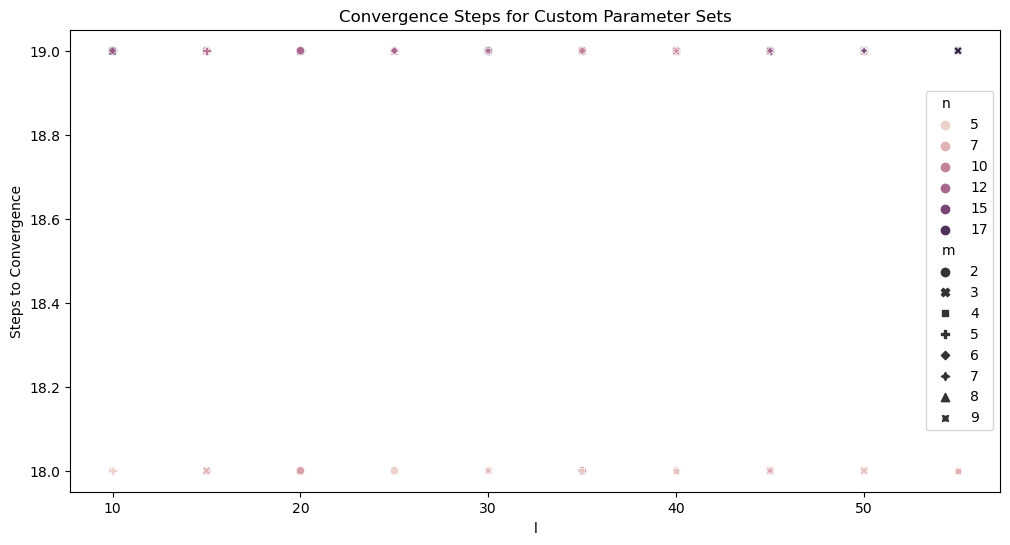

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='l', y='Steps to Convergence', hue='n', style='m')
plt.title('Convergence Steps for Custom Parameter Sets')
plt.show()


In [33]:
print(df)

      l  m   n    p  Steps to Convergence
0    35  4   6   35                    18
1    35  7  19   25                    19
2    10  6  11   50                    19
3    25  6   9   40                    19
4    40  9  17   85                    19
..   .. ..  ..  ...                   ...
495  40  7   9   55                    19
496  20  2   8   30                    18
497  45  7  13  110                    19
498  35  6  10   20                    19
499  50  7  15  105                    19

[500 rows x 5 columns]


In [32]:
df.describe()
correlation_matrix = df.corr()
print(correlation_matrix)


                             l         m         n         p  \
l                     1.000000  0.032849 -0.035461  0.029883   
m                     0.032849  1.000000 -0.009589  0.022491   
n                    -0.035461 -0.009589  1.000000  0.025626   
p                     0.029883  0.022491  0.025626  1.000000   
Steps to Convergence -0.028160  0.034540  0.789583  0.012374   

                      Steps to Convergence  
l                                -0.028160  
m                                 0.034540  
n                                 0.789583  
p                                 0.012374  
Steps to Convergence              1.000000  


In [29]:
import statsmodels.api as sm

# 以 l, m, n, p 为自变量，收敛步数为因变量进行回归分析
X = df[['l', 'm', 'n', 'p']]
y = df['Steps to Convergence']
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print(model.summary())


                             OLS Regression Results                             
Dep. Variable:     Steps to Convergence   R-squared:                       0.625
Model:                              OLS   Adj. R-squared:                  0.622
Method:                   Least Squares   F-statistic:                     206.5
Date:                  Sun, 19 Nov 2023   Prob (F-statistic):          4.79e-104
Time:                          21:33:13   Log-Likelihood:                -68.974
No. Observations:                   500   AIC:                             147.9
Df Residuals:                       495   BIC:                             169.0
Df Model:                             4                                         
Covariance Type:              nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         17.7101      0.061